In [0]:
import pandas as pd

In [0]:
employment_stats = pd.read_csv ("amcatData.csv")

In [0]:
employment_stats.columns

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

In [0]:
employment_stats.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,01-06-2012 00:00,present,senior quality engineer,Bangalore,f,19-02-1990 00:00,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,01-09-2013 00:00,present,assistant manager,Indore,m,04-10-1989 00:00,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,01-06-2014 00:00,present,systems engineer,Chennai,f,03-08-1992 00:00,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,01-07-2011 00:00,present,senior software engineer,Gurgaon,m,05-12-1989 00:00,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,01-03-2014 00:00,01-03-2015 00:00,get,Manesar,m,27-02-1991 00:00,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [0]:
non_numeric_cols = []
for column in employment_stats.columns:
  if (employment_stats [column].dtype == 'object'):
    non_numeric_cols.append (column)
    print("{:15}{:15}".format(column,(employment_stats.groupby(column).size()).shape[0]))

DOJ                         81
DOL                         67
Designation                419
JobCity                    339
Gender                       2
DOB                       1872
10board                    275
12board                    340
Degree                       4
Specialization              46
CollegeState                26


In [0]:
employment_stats = employment_stats.drop ("DOB", axis = 1)
employment_stats = employment_stats.drop ("DOL", axis = 1)
employment_stats = employment_stats.drop("ID", axis = 1)
employment_stats = employment_stats.drop("Designation", axis = 1)
employment_stats = employment_stats.drop("DOJ", axis = 1)
employment_stats = employment_stats.drop("CollegeID", axis = 1)
employment_stats = employment_stats.drop("CollegeCityID", axis = 1)
employment_stats = employment_stats.drop("CollegeCityTier", axis = 1)
non_numeric_cols.remove("DOB")
non_numeric_cols.remove("DOL")
non_numeric_cols.remove("DOJ")
non_numeric_cols.remove("Designation")


In [0]:
description_table = employment_stats.describe()

In [0]:
employment_stats["TechnicalScore"] = 0
employment_stats["TechnicalStrengthCount"] = 0
employment_stats["MajorTechnicalSubject"] = ""

In [0]:
technical_subjects = ["ComputerProgramming", "ElectronicsAndSemicon", "ComputerScience", "MechanicalEngg", "ElectricalEngg", "TelecomEngg", "CivilEngg"]
for index, row in employment_stats.iterrows():
  technical_score = [row["ComputerProgramming"], row["ElectronicsAndSemicon"], row["ComputerScience"], row["MechanicalEngg"], row["ElectricalEngg"], row["TelecomEngg"], row["CivilEngg"]]
  employment_stats.at[index, "TechnicalScore"] = max(technical_score)
  employment_stats.at[index, "TechnicalStrengthCount"] = sum(x > 0 for x in technical_score)
  employment_stats.at[index, "MajorTechnicalSubject"] = technical_subjects[technical_score.index(max(technical_score))]
  

In [0]:
employment_stats = employment_stats.drop("Specialization", axis = 1)
employment_stats = employment_stats.drop("ComputerScience", axis = 1)
employment_stats = employment_stats.drop("ComputerProgramming", axis = 1)
employment_stats = employment_stats.drop("ElectronicsAndSemicon", axis = 1)
employment_stats = employment_stats.drop("MechanicalEngg", axis = 1)
employment_stats = employment_stats.drop("ElectricalEngg", axis = 1)
employment_stats = employment_stats.drop("TelecomEngg", axis = 1)
employment_stats = employment_stats.drop("CivilEngg", axis = 1)
non_numeric_cols.remove("Specialization")

In [0]:
IT_CITY = 1
NON_IT_CITY = 2
it_hubs = ["bangalore", "gurgaon", "noida", "pune", "mumbai", "delhi", "new delhi", "navi mumbai", "hyderabad", "ncr", "chennai"]
for index,row in employment_stats.iterrows():
  if row["JobCity"].lower() in it_hubs:
    employment_stats.at[index, "JobCity"] = IT_CITY
  else:
    employment_stats.at[index, "JobCity"] = NON_IT_CITY
non_numeric_cols.remove("JobCity")

In [0]:
employment_stats.columns

Index(['Salary', 'JobCity', 'Gender', '10percentage', '10board',
       '12graduation', '12percentage', '12board', 'CollegeTier', 'Degree',
       'collegeGPA', 'CollegeState', 'GraduationYear', 'English', 'Logical',
       'Quant', 'Domain', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', 'TechnicalScore',
       'TechnicalStrengthCount', 'MajorTechnicalSubject'],
      dtype='object')

In [0]:
CBSE = 1
ICSE = 2
STATE_BOARD = 3
UNAVAILABLE = 4
for index, row in employment_stats.iterrows():
  if row["10board"].lower() == "cbse" or row["10board"].lower() == "central board of secondary education":
    employment_stats.at[index, "10board"] = CBSE
  elif row["10board"].lower() == "icse" or row["10board"].lower() == "isc":
    employment_stats.at[index, "10board"] = ICSE
  elif row["10board"] == '':
    employment_stats.at[index, "10board"] = UNAVAILABLE
  else:
    employment_stats.at[index, "10board"] = STATE_BOARD
  if row["12board"].lower() == "cbse" or row["12board"].lower() == "central board of secondary education":
    employment_stats.at[index, "12board"] = CBSE
  elif row["12board"].lower() == "icse" or row["12board"].lower() == "isc":
    employment_stats.at[index, "12board"] = ICSE
  elif row["12board"] == '':
    employment_stats.at[index, "12board"] = UNAVAILABLE
  else:
    employment_stats.at[index, "12board"] = STATE_BOARD

In [0]:
non_numeric_cols.remove("10board")
non_numeric_cols.remove("12board")

In [0]:
employment_stats.groupby("Degree").size()

Degree
B.Tech/B.E.      3700
M.Sc. (Tech.)       2
M.Tech./M.E.       53
MCA               243
dtype: int64

In [0]:
employment_stats.groupby("Gender").size()

Gender
f     957
m    3041
dtype: int64

In [0]:
import matplotlib.pyplot as plt

In [0]:
for col_name in employment_stats.columns:
    if(employment_stats[col_name].dtype == 'object'):
        print(col_name)
        employment_stats[col_name]= employment_stats[col_name].astype('category')
        employment_stats[col_name] = employment_stats[col_name].cat.codes

JobCity
Gender
10board
12board
Degree
CollegeState
MajorTechnicalSubject


In [0]:

minOutliers = []
maxOutliers = []
outlierFeatures = []
descriptionTable = employment_stats.describe()
for i in employment_stats.columns:
  if(descriptionTable[i][6] != descriptionTable[i][4]):
    outlierFeatures.append(i)
    interQuartile = ((descriptionTable[i][6] - descriptionTable[i][4]) * 1.5)
    minOutliers.append((descriptionTable[i][4]) - interQuartile)
    maxOutliers.append((descriptionTable[i][6]) + interQuartile)
print(outlierFeatures)

['Salary', 'JobCity', '10percentage', '10board', '12graduation', '12percentage', '12board', 'collegeGPA', 'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant', 'Domain', 'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience', 'TechnicalScore', 'TechnicalStrengthCount', 'MajorTechnicalSubject']


Text(0, 0.5, 'Number of candidates')

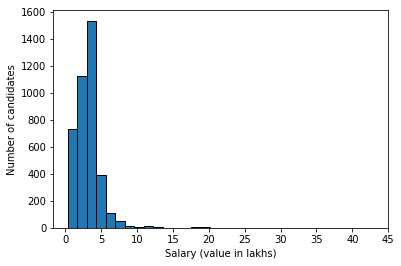

In [0]:
plt.hist(employment_stats['Salary'], bins = 30, edgecolor = "black")
plt.xticks([0, 500000, 1000000, 1500000, 2000000, 2500000, 3000000, 3500000, 4000000, 4500000], [0, 5, 10, 15, 20, 25, 30, 35, 40, 45])
plt.xlabel("Salary (value in lakhs)")
plt.ylabel("Number of candidates")

In [0]:
for i in range(len(outlierFeatures)):
    employment_stats = employment_stats [employment_stats [outlierFeatures[i]] >= minOutliers[i]]
    employment_stats = employment_stats [employment_stats [outlierFeatures[i]] <= maxOutliers[i]]
    print(outlierFeatures[i], minOutliers[i], maxOutliers[i])

Salary -105000.0 655000.0
JobCity -1.5 2.5
10percentage 50.69499999999998 106.65500000000002
10board -3.0 5.0
12graduation 2004.0 2012.0
12percentage 41.10000000000001 107.49999999999999
12board -3.0 5.0
collegeGPA 51.527499999999996 91.20750000000001
CollegeState -7.0 41.0
GraduationYear 2009.0 2017.0
English 207.5 787.5
Logical 265.0 745.0
Quant 182.5 842.5
Domain -0.4075852329999999 1.5921484549999998
conscientiousness -2.8378625000000004 2.8270375000000003
agreeableness -1.93695 2.46265
extraversion -2.5200000000000005 2.5872
nueroticism -2.9598 2.6178
openess_to_experience -2.4266 2.2598000000000003
TechnicalScore 180.0 700.0
TechnicalStrengthCount -0.5 3.5
MajorTechnicalSubject -2.0 6.0


In [0]:
employment_stats.shape

(3276, 25)

Salary
0    1795
1    1481
dtype: int64


Text(0, 0.5, 'Number of Candidates')

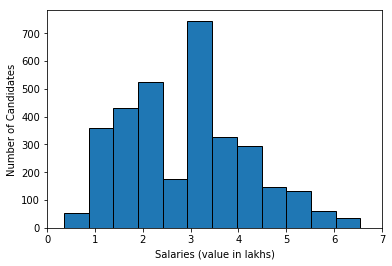

In [0]:
BELOW_AVG_SALARY = 0
ABOVE_AVG_SALARY = 1
AVG_SAL = 300000
salaries = [] 
female_salary = []
male_salary = []
for index,row in employment_stats.iterrows():
  salaries.append(row['Salary'])
  if row['Gender'] == 0:
    female_salary.append(row['Salary'])
  else:
    male_salary.append(row['Salary'])
  if row['Salary'] <= AVG_SAL:
    employment_stats.at[index, "Salary"] = BELOW_AVG_SALARY
  else:
    employment_stats.at[index, "Salary"] = ABOVE_AVG_SALARY
print(employment_stats.groupby("Salary").size())
plt.hist(salaries, bins = 12, edgecolor = "black", linewidth = 1)
plt.xlabel("Salaries (value in lakhs)")
locs, labels = plt.xticks()
plt.xticks(locs, [int(i//100000) for i in locs])
plt.ylabel("Number of Candidates")

In [0]:
employment_stats.columns

Index(['Salary', 'JobCity', 'Gender', '10percentage', '10board',
       '12graduation', '12percentage', '12board', 'CollegeTier', 'Degree',
       'collegeGPA', 'CollegeState', 'GraduationYear', 'English', 'Logical',
       'Quant', 'Domain', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', 'TechnicalScore',
       'TechnicalStrengthCount', 'MajorTechnicalSubject'],
      dtype='object')

In [0]:
employment_stats = employment_stats[employment_stats["Degree"] != "M.Sc. (Tech.)"]    

Text(0, 0.5, 'Number of Candidates')

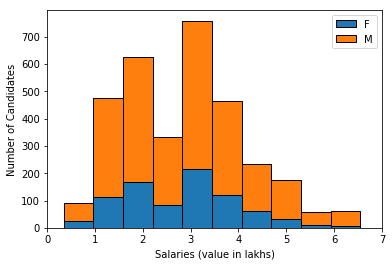

In [0]:
plt.hist([female_salary, male_salary], histtype='bar', stacked=True, edgecolor = "black")
plt.legend("FM")
plt.xlabel("Salaries (value in lakhs)")
locs, labels = plt.xticks()
plt.xticks(locs, [int(i//100000) for i in locs])
plt.ylabel("Number of Candidates")

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
modelList = []
modelList.append(('KNN', KNeighborsClassifier()))
modelList.append(('SVC', SVC()))
modelList.append(('LR', LogisticRegression()))
modelList.append(('DT', DecisionTreeClassifier()))
modelList.append(('GNB', GaussianNB()))
modelList.append(('RFC', RandomForestClassifier()))
modelList.append(('GB', GradientBoostingClassifier()))

In [0]:
import numpy as np
from sklearn.model_selection import train_test_split
input_feature = ['JobCity', 'Gender', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeTier', 'Degree',
       'collegeGPA', 'CollegeState',
       'GraduationYear', 'English', 'Logical', 'Quant', 'Domain',
       'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience', 'TechnicalScore', 'TechnicalStrengthCount',  
       'MajorTechnicalSubject']
X = employment_stats[input_feature]
Y = employment_stats.Salary
X, X_VAL, Y, Y_VAL = train_test_split(X, Y, stratify = employment_stats.Salary, train_size = 0.9, random_state = 0)
X = np.array(X)
Y = np.array(Y)

In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
import warnings

In [0]:
k_folds = StratifiedKFold(n_splits = 9)

In [0]:
warnings.simplefilter('ignore')
names = []
score = []
score_on_validation = []
for name, model in modelList:
  names.append(name)
  accuracy = []
  for train_index, test_index in k_folds.split(X, Y):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test =  Y[train_index], Y[test_index]
    model.fit(X_train, Y_train)
    accuracy.append(model.score(X_test, Y_test))
  score.append(sum(accuracy) / len(accuracy))
  score_on_validation.append(model.score(X_VAL, Y_VAL))
table_testdata = pd.DataFrame({'Name ': names, 'Score': score})
table_validation = pd.DataFrame({'Name ': names, 'Score': score_on_validation})
print("\n Accuracy for test data \n")
print(table_testdata)
print("\n Accuracy on validation data \n")
print(table_validation)


 Accuracy for test data 

  Name      Score
0   KNN  0.615322
1   SVC  0.547829
2    LR  0.698769
3    DT  0.602097
4   GNB  0.694363
5   RFC  0.675041
6    GB  0.709976

 Accuracy on validation data 

  Name      Score
0   KNN  0.640244
1   SVC  0.548780
2    LR  0.695122
3    DT  0.615854
4   GNB  0.689024
5   RFC  0.698171
6    GB  0.725610


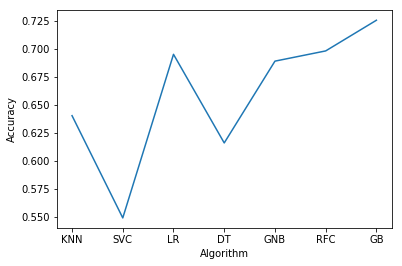

In [0]:
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.plot(names, score_on_validation)